<a href="https://colab.research.google.com/github/phps-28/Data-Science-PGEBM/blob/master/Mestrado%20/Projeto/Teste_2_Classifica%C3%A7%C3%A3o_de_Imagens_de_Embri%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importando as Libs**

In [75]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

## Subindo o arquivo zipado com as imagens

In [76]:
!unzip -q 100.zip
!ls

replace 100/AA/3AA.1.PNG? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
_  100	100_____  100.zip  sample_data


Agora temos uma pasta '100' que contém 7 subpastas. Cada subpasta contem arquivos de imagem de cada categoria.

In [77]:
!ls 100

AA  CB


In [78]:
import os	#"AB", "BA", "BB",	"BC", "CA",

# Testes com todas as categorias
num_skipped = 0
for folder_name in ("AA", "CB"): # descrevendo as pastas presentes dentro do arquivo main "100"
    folder_path = os.path.join("100", folder_name) # juntando o caminho de cada uma das pastas com o caminho da main pasta(100)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname) # estabelecendo o caminho completo de cada imagem dentro da pasta main e subpastas
        try:
            fobj = open(fpath, "rb") # lendo e abrindo cada uma das imagens
            is_pfif = tf.compat.as_bytes("PFIF") in fobj.peek(10) # verificando a extensão correta das imagens '.png'
        finally:
            fobj.close()

print("Deletadas %d imagens" % num_skipped)

Deletadas 0 imagens


## Visualizando as Imagens

In [79]:
sample_image = tf.keras.preprocessing.image.load_img(r'/content/100/AA/3AA.1.PNG', target_size = (224, 224))

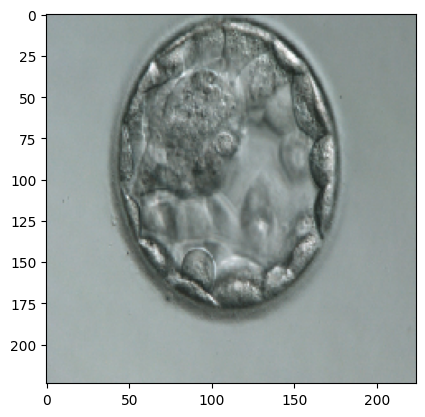

In [80]:
plt.imshow(sample_image);

In [81]:
type(sample_image)

PIL.Image.Image

In [82]:
sample_image = tf.keras.preprocessing.image.img_to_array(sample_image)

In [83]:
type(sample_image)

numpy.ndarray

In [84]:
np.shape(sample_image)

(224, 224, 3)

In [85]:
sample_image = np.expand_dims(sample_image, axis = 0)

In [86]:
sample_image.shape

(1, 224, 224, 3)

In [87]:
sample_image.max() # + próximo de branco

254.0

In [88]:
sample_image.min() # + próximo de preto

30.0

Fazendo a normalização dos pixels da imagem usando o pre processamento da ResNet50

In [89]:
sample_image = tf.keras.applications.resnet50.preprocess_input(sample_image)

In [90]:
sample_image.max() # + próximo de branco

150.061

In [91]:
sample_image.min() # + próximo de preto

-93.68

## Fazer a Tranferência de Aprendizado e Reuso do Modelo

In [92]:
base_model =  tf.keras.applications.ResNet50(weights = 'imagenet', include_top = False)

In [93]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, None, None, 3)        0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, None, None, 64)       9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1_conv[0][0]']          
 on)                                                                                       

Agora será criada a rede neural Densa, que será personalizada, para juntá-la com essas camadas de convolução e pooling da ResNet 50

In [94]:
x = base_model.output

In [95]:
# Será feito a diminuição da dimensão desta última camada de saída da rede ResNet50 fazedno um pooling com a média dos valores da matriz dos pixels
x = tf.keras.layers.GlobalAveragePooling2D()(x)

In [96]:
# Criando as camadas Densas personalizadas
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
preds = tf.keras.layers.Dense(2, activation='softmax')(x)

In [97]:
# Criando um modelo que seja a união do modelo pré treinado + as camadas densas personalizadas
model = tf.keras.models.Model(inputs = base_model.input, outputs = preds)

In [98]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, None, None, 3)        0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, None, None, 64)       9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [99]:
for i, layer in enumerate(model.layers):
  print(i, layer.name)

0 input_3
1 conv1_pad
2 conv1_conv
3 conv1_bn
4 conv1_relu
5 pool1_pad
6 pool1_pool
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_conv
11 conv2_block1_2_bn
12 conv2_block1_2_relu
13 conv2_block1_0_conv
14 conv2_block1_3_conv
15 conv2_block1_0_bn
16 conv2_block1_3_bn
17 conv2_block1_add
18 conv2_block1_out
19 conv2_block2_1_conv
20 conv2_block2_1_bn
21 conv2_block2_1_relu
22 conv2_block2_2_conv
23 conv2_block2_2_bn
24 conv2_block2_2_relu
25 conv2_block2_3_conv
26 conv2_block2_3_bn
27 conv2_block2_add
28 conv2_block2_out
29 conv2_block3_1_conv
30 conv2_block3_1_bn
31 conv2_block3_1_relu
32 conv2_block3_2_conv
33 conv2_block3_2_bn
34 conv2_block3_2_relu
35 conv2_block3_3_conv
36 conv2_block3_3_bn
37 conv2_block3_add
38 conv2_block3_out
39 conv3_block1_1_conv
40 conv3_block1_1_bn
41 conv3_block1_1_relu
42 conv3_block1_2_conv
43 conv3_block1_2_bn
44 conv3_block1_2_relu
45 conv3_block1_0_conv
46 conv3_block1_3_conv
47 conv3_block1_0_bn
48 conv3_block1_3_bn

In [100]:
# Como as camadas até a 175 são do modelo que já foi treinado, até a 175 não precisa ser treinada novamente
for layer in model.layers[:175]:
  layer.trainable = False

In [101]:
# serão treinadas as cmadas da 175 em diante, que são as camadas densas personalizadas
for layer in model.layers[175:]:
  layer.trainable = True

In [102]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input)

In [103]:
train_generator = train_datagen.flow_from_directory('/content/100',
                                                    target_size = (224,224),
                                                    color_mode = 'rgb',
                                                    batch_size = 5,
                                                    class_mode = 'categorical',
                                                    shuffle = True)

Found 33 images belonging to 2 classes.


In [104]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [105]:
history = model.fit_generator(generator=train_generator,
                              epochs = 10)

Epoch 1/10


<ipython-input-105-8384b24ae74d>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_generator,


7/7 [==============================] - 5s 35ms/step - loss: 1.4355 - accuracy: 0.6970
Epoch 2/10
7/7 [==============================] - 0s 40ms/step - loss: 0.3669 - accuracy: 0.7576
Epoch 3/10
7/7 [==============================] - 0s 39ms/step - loss: 0.2927 - accuracy: 0.9394
Epoch 4/10
7/7 [==============================] - 0s 39ms/step - loss: 0.5727 - accuracy: 0.8788
Epoch 5/10
7/7 [==============================] - 0s 41ms/step - loss: 0.1740 - accuracy: 0.9091
Epoch 6/10
7/7 [==============================] - 0s 39ms/step - loss: 0.1097 - accuracy: 0.9394
Epoch 7/10
7/7 [==============================] - 0s 40ms/step - loss: 0.0059 - accuracy: 1.0000
Epoch 8/10
7/7 [==============================] - 0s 40ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 9/10
7/7 [==============================] - 0s 45ms/step - loss: 9.2296e-05 - accuracy: 1.0000
Epoch 10/10
7/7 [==============================] - 0s 38ms/step - loss: 5.5803e-05 - accuracy: 1.0000


## Avaliando o Modelo

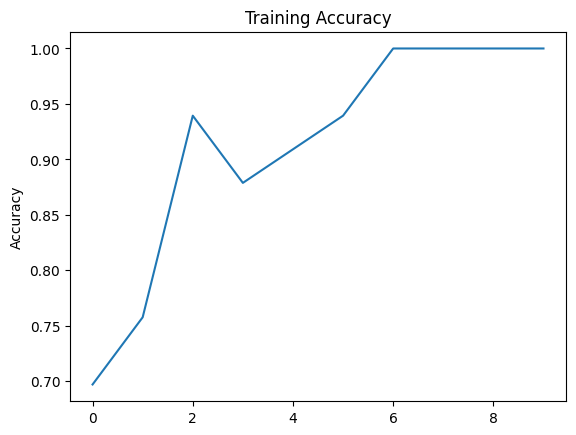

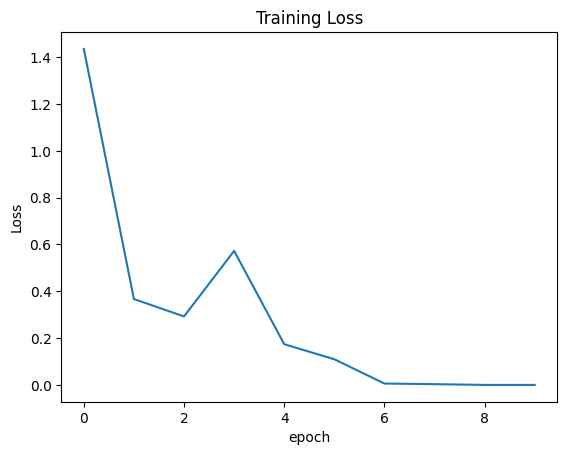

In [106]:
acc = history.history['accuracy']
loss = history.history['loss']

plt.figure()
plt.plot(acc, label='Training Accuracy')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')

plt.figure()

plt.plot(loss, label='Training Loss')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.xlabel('epoch')
plt.show()

## Testando o novo Modelo

In [130]:
image_test = tf.keras.preprocessing.image.load_img(r'/content/2BB 1.PNG', target_size=(224,224))

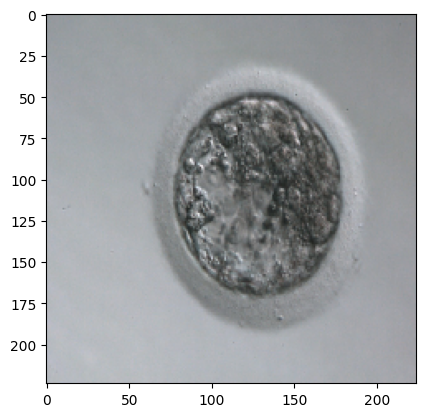

In [131]:
plt.imshow(image_test)

In [132]:
image_test = tf.keras.preprocessing.image.img_to_array(image_test)
np.shape(image_test)

(224, 224, 3)

In [133]:
image_test = np.expand_dims(image_test, axis = 0)
np.shape(image_test)

(1, 224, 224, 3)

In [134]:
image_test = tf.keras.applications.resnet50.preprocess_input(image_test)

In [135]:
predictions = model.predict(image_test)
print(predictions)

1/1 [==============================] - 0s 25ms/step
[[0.20401381 0.7959862 ]]


In [136]:
AA = float(predictions[0][0])
CB = float(predictions[0][1])
print(f" {100 * AA:.2f}% AA\n {100 * CB:.2f}% CB.")

 20.40% AA
 79.60% CB.
